In [ ]:
#A FAIRE: binariser tout & essayer a 3 classes avec la categorical_crossentropy & comparer les 2

### GPU verification

### Imports

In [2]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow import keras as keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread, imshow
from skimage.transform import resize

# Don't Show Warning Messages 
import warnings
warnings.filterwarnings('ignore')

### GPU verification

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


### Constants

In [4]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 1

NUM_TEST_IMAGES = 10

### Loading the data

In [9]:
X_train_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/originals')
y_train_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/labels_2_classes')


In [10]:
# making the names of X_train and y_train correspond

X_train_paths.sort()
y_train_paths.sort()
for i in range(10):
    print("x_train["+str(i)+"] : "  +X_train_paths[i])
for i in range(10):
    print("y_train["+str(i)+"] : "  +y_train_paths[i])


x_train[0] : 00000_split_00000.pgm
x_train[1] : 00000_split_00001.pgm
x_train[2] : 00000_split_00002.pgm
x_train[3] : 00000_split_00003.pgm
x_train[4] : 00000_split_00004.pgm
x_train[5] : 00000_split_00005.pgm
x_train[6] : 00000_split_00006.pgm
x_train[7] : 00000_split_00007.pgm
x_train[8] : 00000_split_00008.pgm
x_train[9] : 00000_split_00009.pgm
y_train[0] : 00000.pgm
y_train[1] : 00001.pgm
y_train[2] : 00002.pgm
y_train[3] : 00003.pgm
y_train[4] : 00004.pgm
y_train[5] : 00005.pgm
y_train[6] : 00006.pgm
y_train[7] : 00007.pgm
y_train[8] : 00008.pgm
y_train[9] : 00009.pgm


In [11]:
nb_img=len(X_train_paths)
img_height=128
img_width=128
X_train = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)
y_train = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)


for i in range(len(X_train_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/originals/' + X_train_paths[i])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    X_train[i]=img
X_train.shape

for j in range(len(y_train_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/labels_2_classes/' + y_train_paths[j])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    y_train[j]=img
y_train.shape

#X_train=np.array(X_train).reshape(624,128,128,1)
#y_train=np.array(y_train).reshape(624,128,128,1)

(66181, 128, 128, 1)

### Tests

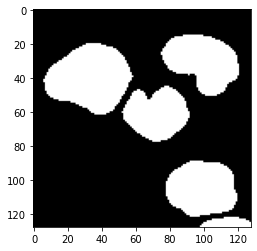

Values of y_train_merged : [0 1]


In [8]:
plt.imshow(y_train[2], cmap='gray')
plt.show()
print("Values of y_train_merged : " + str(np.unique(y_train[8])))

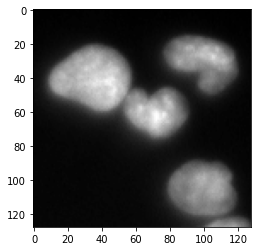

In [9]:
#Montrer une image
from PIL import Image as im
plt.imshow(X_train[2], cmap='gray')
#plt.imshow(y_train[0], cmap='gray')
plt.show()
#data = im.fromarray(X_train[0])
#data.type

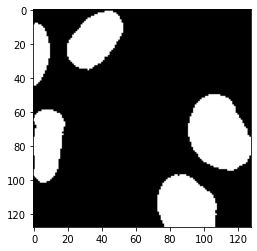

In [10]:
#Montrer une image
from PIL import Image as im
plt.imshow(y_train[0], cmap='gray')
plt.show()
#data = im.fromarray(X_train[0])
#data.type

### 2-classes model

In [12]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model2 = Model(inputs=[inputs], outputs=[outputs])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])
# model2.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='victor/Graph', histogram_freq=0, write_graph=True, write_images=True)

In [13]:
checkpoint_path = "model/cp2class.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [15]:
n=len(X_train)
r=int(n*0.8)

history = model2.fit(X_train[:r], y_train[:r], validation_split=0.1, batch_size=16, epochs=50,callbacks=[tbCallBack])

Train on 47649 samples, validate on 5295 samples
Epoch 1/50
47649/47649 [==============================] - 78s 2ms/sample - loss: 0.0437 - acc: 0.9813 - val_loss: 0.0420 - val_acc: 0.9813
Epoch 2/50
47649/47649 [==============================] - 80s 2ms/sample - loss: 0.0339 - acc: 0.9854 - val_loss: 0.0291 - val_acc: 0.9878
Epoch 3/50
47649/47649 [==============================] - 82s 2ms/sample - loss: 0.0312 - acc: 0.9866 - val_loss: 0.0278 - val_acc: 0.9885
Epoch 4/50
47649/47649 [==============================] - 83s 2ms/sample - loss: 0.0294 - acc: 0.9874 - val_loss: 0.0257 - val_acc: 0.9897
Epoch 5/50
47649/47649 [==============================] - 83s 2ms/sample - loss: 0.0286 - acc: 0.9877 - val_loss: 0.0265 - val_acc: 0.9891
Epoch 6/50
47649/47649 [==============================] - 82s 2ms/sample - loss: 0.0290 - acc: 0.9876 - val_loss: 0.0265 - val_acc: 0.9889
Epoch 7/50
47649/47649 [==============================] - 82s 2ms/sample - loss: 0.0272 - acc: 0.9884 - val_loss: 0.0

In [16]:
!mkdir -p saved_model
model2.save('victor/saved_model/2CLASSES_NEW_DATA')


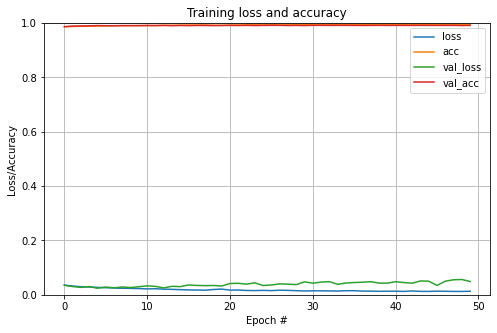

In [15]:
#learning curve
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

### Evaluating the model on the testing data

In [16]:
score = model2.evaluate(X_train[r+1:], y_train[r+1:], verbose = 0)
print("Loss : " + str(score[0]) + "  Accuracy : " + str(score[1]))

Loss : 0.04541309696837876  Accuracy : 0.98918664


### Tests

In [18]:
X_test_paths.sort()
for i in range(10):
    print("x_test["+str(i)+"] : "  +X_test_paths[i])

NameError: name 'X_paths' is not defined

In [19]:
nb_img=len(X_test_paths)
img_height=128
img_width=128
X_test = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)


for i in range(len(X_test_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/originals/' + X_test_paths[i])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    X_test[i]=img
X_test.shape

NameError: name 'X_test_paths' is not defined

In [16]:
nb_img=len(y_test_paths)
img_height=128
img_width=128
y_test = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)


for i in range(len(y_test_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/labels_crop_2colors/' + y_test_paths[i])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    y_test[i]=img
y_test.shape

(11271, 128, 128, 1)

In [26]:
y_test=MergeClass(y_test,2)

In [20]:
predict=model2.predict(X_test)

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (128, 128, 1)

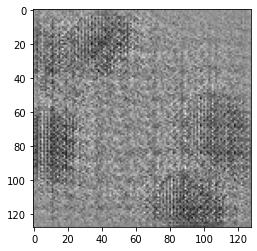

In [18]:
from PIL import Image as im
plt.imshow(predict[0], cmap='gray')
plt.show()


In [27]:
evaluate=model2.evaluate(predict, y_test)

11271/11271 [==============================] - 5s 463us/sample - loss: 4.5252


In [5]:
plt.figure(figsize=(20,20))
nb=np.random.randint(0,624)
for i in range(nb):
    plt.imshow(predict[i],cmap='gray')
    plt.imshow(y_test[i], cmap='gray')
    plt.show()

NameError: name 'predict' is not defined

<Figure size 1440x1440 with 0 Axes>